In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation


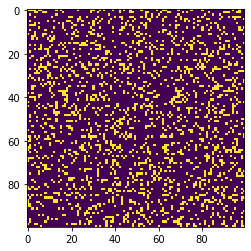

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [2]:


# Cellular automaton rules
def update(frameNum, img, grid, N):
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                         grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                         grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                         grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N]) / 255)
            if grid[i, j]  == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

# main() function

def main():
    N = 100
    global grid, ON, OFF, vals
    ON = 255
    OFF = 0
    vals = [ON, OFF]

    # populate grid with random on/off - more off than on
    grid = np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)

    # set up animation
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest')
    ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
                                  frames = 10,
                                  interval=50,
                                  save_count=50)

    plt.show()


main()
